<a href="https://colab.research.google.com/github/mjuliasm/covid_19/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisando dados de COVID 19**

In [155]:
#Importando as biblotecas

import pandas as pd
import matplotlib.pyplot as plt

In [156]:
#Lendo o arquivo com as informações disponíveis

covid = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [157]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [158]:
#Analisando o tamanho do df
covid.shape

(278238, 8)

In [159]:
#Filtrando os dados para quando os casos acumulados forem números diferentes de 0, ou seja, quando os casos começarem a aparecer

covid = covid[covid['Cumulative_cases'] > 0]


In [160]:
#Vendo a mudança na quantidade de linhas por conta do filtro acima
covid.shape


(250813, 8)

In [161]:
#Colocando a data como índice e ajustando apenas para as colunas que desejamos visualizar

covid = covid.set_index('Date_reported')
covid = covid[['Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']]

## **Análises do Brasil**

In [162]:
#Separando os dados apenas do Brasil

brasil = covid.loc[covid['Country']=='Brazil']

In [163]:
brasil.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-02-27,Brazil,1,1,0,0
2020-02-28,Brazil,0,1,0,0
2020-02-29,Brazil,0,1,0,0
2020-03-01,Brazil,0,1,0,0
2020-03-02,Brazil,1,2,0,0


In [164]:
#Descobrindo primeiro caso (dia 27/02/2020)
brasil.loc[brasil['Cumulative_cases']>0]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-02-27,Brazil,1,1,0,0
2020-02-28,Brazil,0,1,0,0
2020-02-29,Brazil,0,1,0,0
2020-03-01,Brazil,0,1,0,0
2020-03-02,Brazil,1,2,0,0
...,...,...,...,...,...
2023-03-17,Brazil,0,37145514,0,699634
2023-03-18,Brazil,0,37145514,0,699634
2023-03-19,Brazil,0,37145514,0,699634


In [165]:
#Descobrindo primeira morte (19/03/2020)
brasil.loc[brasil['Cumulative_deaths']>0]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-03-19,Brazil,57,291,1,1
2020-03-20,Brazil,137,428,3,4
2020-03-21,Brazil,0,428,0,4
2020-03-22,Brazil,476,904,7,11
2020-03-23,Brazil,0,904,0,11
...,...,...,...,...,...
2023-03-17,Brazil,0,37145514,0,699634
2023-03-18,Brazil,0,37145514,0,699634
2023-03-19,Brazil,0,37145514,0,699634


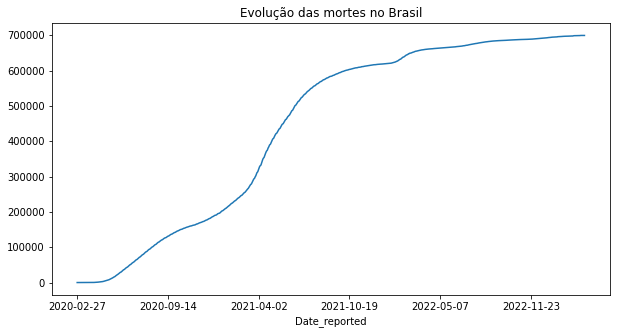

In [166]:
plt.figure(figsize=(10, 5))
brasil['Cumulative_deaths'].plot()
plt.title('Evolução das mortes no Brasil')

plt.show()

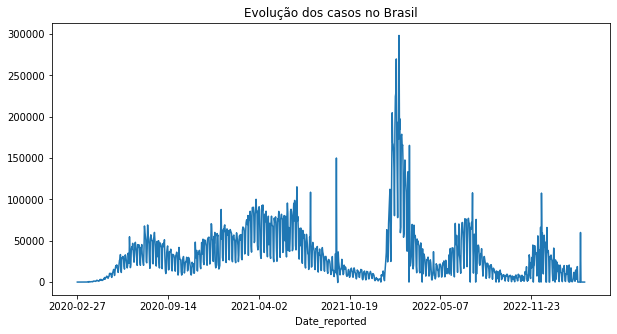

In [167]:
plt.figure(figsize=(10, 5))
brasil['New_cases'].plot()
plt.title('Evolução dos casos no Brasil')

plt.show()

In [168]:
#Descobrindo o dia que teve mais casos novos registrados no Brasil

brasil.loc[brasil['New_cases'] == brasil['New_cases'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2022-02-05,Brazil,298408,26091520,1041,630001


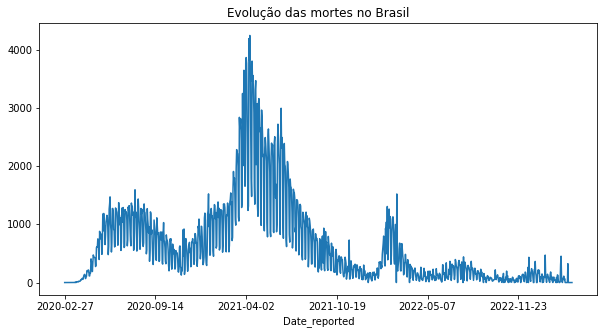

In [169]:
plt.figure(figsize=(10, 5))
brasil['New_deaths'].plot()
plt.title('Evolução das mortes no Brasil')

plt.show()

In [170]:
#Descobrindo o dia que teve mais mortes registradas no Brasil

brasil.loc[brasil['New_deaths'] == brasil['New_deaths'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2021-04-10,Brazil,86652,13279857,4249,345025


## **Análise de todos os países** 




In [171]:
#Descobrindo qual país teve maior quantidade de mortes

covid.loc[covid['Cumulative_deaths']  == covid['Cumulative_deaths'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2023-03-18,United States of America,126613,102544598,1741,1114970
2023-03-19,United States of America,0,102544598,0,1114970
2023-03-20,United States of America,0,102544598,0,1114970
2023-03-21,United States of America,0,102544598,0,1114970


In [172]:
#Calculando % de mortes por contaminação

covid['% Deaths/Cases'] = (covid ['Cumulative_deaths'] / covid['Cumulative_cases'])*100

In [173]:
#Descobrindo qual país teve maior taxa de mortalidade

covid.loc[covid['% Deaths/Cases']  == covid['% Deaths/Cases'].max()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
Date_reported,,,,,,
2020-03-31,Mauritania,0,5,149,149,2980.0
2020-04-01,Mauritania,0,5,0,149,2980.0


In [174]:
#Descobrindo qual país teve maior taxa de mortalidade

covid.loc[covid['% Deaths/Cases']  == covid['% Deaths/Cases'].min()]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
Date_reported,,,,,,
2020-02-24,Afghanistan,5,5,0,0,0.0
2020-02-25,Afghanistan,0,5,0,0,0.0
2020-02-26,Afghanistan,0,5,0,0,0.0
2020-02-27,Afghanistan,0,5,0,0,0.0
2020-02-28,Afghanistan,0,5,0,0,0.0
...,...,...,...,...,...,...
2020-03-29,Zambia,6,28,0,0,0.0
2020-03-30,Zambia,1,29,0,0,0.0
2020-03-31,Zambia,6,35,0,0,0.0


In [175]:
covid = covid.reset_index()

# Buscando a informação mais recente do dataframe
covid_final = covid.loc[covid['Date_reported'] == covid['Date_reported'].max()]

In [177]:
#País com a maior taxa de letalidade

covid_final.loc[covid_final['% Deaths/Cases'] == covid_final['% Deaths/Cases'].max()]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
248618,2023-03-21,Yemen,0,11945,0,2159,18.074508


In [178]:
#País com a menor taxa de letalidade

covid_final.loc[covid_final['% Deaths/Cases'] == covid_final['% Deaths/Cases'].min()]

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,% Deaths/Cases
74097,2023-03-21,Falkland Islands (Malvinas),0,1923,0,0,0.0
100796,2023-03-21,Holy See,0,26,0,0,0.0
164225,2023-03-21,Niue,0,747,0,0,0.0
178439,2023-03-21,Pitcairn Islands,0,4,0,0,0.0
192044,2023-03-21,"Saint Helena, Ascension and Tristan da Cunha",0,2166,0,0,0.0
229398,2023-03-21,Tokelau,0,5,0,0,0.0
234626,2023-03-21,Tuvalu,0,2779,0,0,0.0
